In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split

import pickle

# Keras and Tensorflow

np.random.seed(42)

from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras import utils
from keras.datasets import mnist
 

In [2]:
# pickle.dump(model, open('model.pkl','wb'))

NameError: name 'model' is not defined

In [3]:
# import sys

# !{sys.executable} -m pip install opencv-python

import cv2

In [4]:
working_directory = 'C:/Users/gabri/Dropbox/General Assembly/projects/capstone'

In [8]:
%ls ..

 Volume in drive C is Local Disk
 Volume Serial Number is AAFC-6767

 Directory of C:\Users\gabri\Dropbox\General Assembly\projects\capstone

11/19/2020  16:25    <DIR>          .
11/19/2020  16:25    <DIR>          ..
11/09/2020  21:42    <DIR>          .ipynb_checkpoints
11/19/2020  16:25            37,378 angry.jpg
11/04/2020  13:14            24,710 Capstone Check-in #1.pdf
11/10/2020  10:21           139,590 check_in_2.ipynb
11/10/2020  10:37    <DIR>          datasets
11/03/2020  19:07               116 debug.log
11/09/2020  21:10    <DIR>          FEC_dataset
11/09/2020  21:09        38,183,400 FEC_dataset.zip
11/19/2020  19:06    <DIR>          GA-TOR-Jabberwocky-Capstone-App
11/19/2020  18:04    <DIR>          GA-TOR-Jabberwocky-Capstone-Project-main
11/10/2020  10:28           112,861 GA-TOR-Jabberwocky-Capstone-Project-main.zip
11/19/2020  16:07           111,973 happy_face.jpg
11/19/2020  16:21            70,415 happy_face_2.jpg
11/19/2020  16:24            88,111 sad_face.

In [9]:
image_file = f'{working_directory}/sample_image_2.jpeg'
image = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (48,48))
image = image / 255
image = np.expand_dims(image, axis=2)

In [5]:
image.shape

(48, 48, 1)

In [6]:
zeros_4dim = np.zeros(shape=(1,48,48,1))

zeros_4dim[0] = image

zeros_4dim

array([[[[0.67058824],
         [0.68235294],
         [0.69019608],
         ...,
         [0.54509804],
         [0.51764706],
         [0.50588235]],

        [[0.68235294],
         [0.68627451],
         [0.69411765],
         ...,
         [0.55686275],
         [0.54117647],
         [0.52941176]],

        [[0.69411765],
         [0.69803922],
         [0.70980392],
         ...,
         [0.56862745],
         [0.56078431],
         [0.54117647]],

        ...,

        [[0.64705882],
         [0.65098039],
         [0.6627451 ],
         ...,
         [0.4627451 ],
         [0.50588235],
         [0.50588235]],

        [[0.62745098],
         [0.62745098],
         [0.65882353],
         ...,
         [0.4745098 ],
         [0.47843137],
         [0.49411765]],

        [[0.61960784],
         [0.63137255],
         [0.64313725],
         ...,
         [0.85098039],
         [0.76862745],
         [0.48627451]]]])

In [7]:
model = load_model('C:\\Users\\gabri\\Dropbox\\General Assembly\\projects\\capstone\\GA-TOR-Jabberwocky-Capstone-Project-main\\model_2.h5')

<BarContainer object of 7 artists>

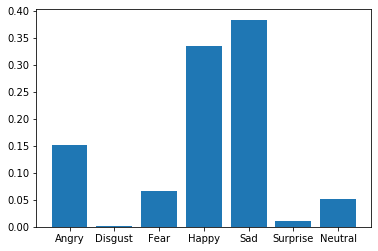

In [8]:
predicted_probs = model.predict(zeros_4dim)
em_arr = ['Angry','Disgust','Fear','Happy','Sad','Surprise','Neutral']
plt.bar(em_arr, height=predicted_probs[0])

In [9]:
model.predict_classes(zeros_4dim)

array([4], dtype=int64)

In [10]:
image_file_2 = f'{working_directory}/sample_image_2.jpeg'
image2 = cv2.imread(image_file_2, cv2.IMREAD_GRAYSCALE)
image2 = cv2.resize(image2, (48,48))
image2 = image2 / 255
image2 = np.expand_dims(image2, axis=2)
zeros_4dim = np.zeros(shape=(1,48,48,1))
zeros_4dim[0] = image2
zeros_4dim

array([[[[0.89019608],
         [0.89019608],
         [0.89803922],
         ...,
         [0.78823529],
         [0.79215686],
         [0.76078431]],

        [[0.89019608],
         [0.89411765],
         [0.89019608],
         ...,
         [0.78431373],
         [0.78431373],
         [0.73333333]],

        [[0.89019608],
         [0.89019608],
         [0.89019608],
         ...,
         [0.80392157],
         [0.77647059],
         [0.77254902]],

        ...,

        [[0.75686275],
         [0.76078431],
         [0.78823529],
         ...,
         [0.79607843],
         [0.77254902],
         [0.76862745]],

        [[0.72941176],
         [0.74509804],
         [0.76470588],
         ...,
         [0.76470588],
         [0.79215686],
         [0.77254902]],

        [[0.73333333],
         [0.74117647],
         [0.74901961],
         ...,
         [0.79215686],
         [0.79215686],
         [0.76470588]]]])

<BarContainer object of 7 artists>

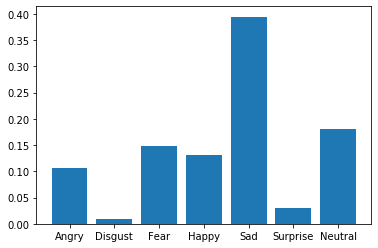

In [11]:
predicted_probs = model.predict(zeros_4dim)
plt.bar(em_arr, height=predicted_probs[0])

In [12]:
def emotion_histogram(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (48,48))
    image = image / 255
    image = np.expand_dims(image, axis=2)
    zeros_4dim = np.zeros(shape=(1,48,48,1))
    zeros_4dim[0] = image
    predicted_probs = model.predict(zeros_4dim)
    
    plt.bar(em_arr, height=predicted_probs[0])
    plt.savefig('prediction.png')
    
    return plt.bar(em_arr, height=predicted_probs[0])

In [17]:
%pwd

'C:\\Users\\gabri\\Dropbox\\General Assembly\\projects\\capstone\\GA-TOR-Jabberwocky-Capstone-Project-main'

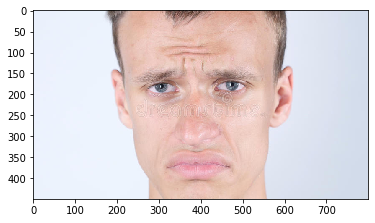

In [13]:
image_5 = plt.imread(f'{working_directory}/sample_image_5.jpeg')
plt.imshow(image_5)

<BarContainer object of 7 artists>

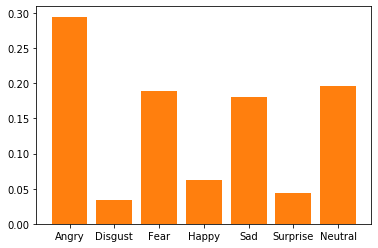

In [14]:
emotion_histogram(f'{working_directory}/sample_image_5.jpeg')

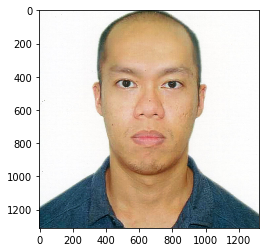

In [15]:
gabriel = plt.imread('C:/Users/gabri/Dropbox/General Assembly/projects/capstone/GA-TOR-Jabberwocky-Capstone-App/static/uploads/img001.jpg')
plt.imshow(gabriel)

<BarContainer object of 7 artists>

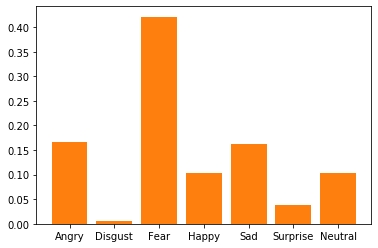

In [16]:
emotion_histogram('C:/Users/gabri/Dropbox/General Assembly/projects/capstone/GA-TOR-Jabberwocky-Capstone-App/static/uploads/img001.jpg')